MAE: 97470.45443964953
RMSE: 189581.3011801111
R2 Score: 0.5217940800558418


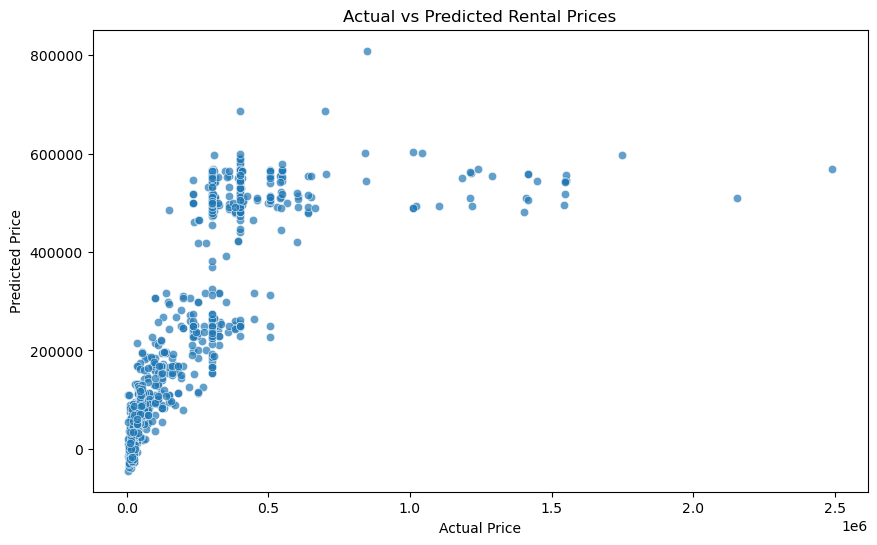

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re  # Import regex for text cleaning

# Load Dataset
df = pd.read_csv("/Users/cm/Desktop/Indian_housing_Delhi_data.csv")
df.dropna(inplace=True)  # Drop missing values

# Rename columns to standard names for consistency
df.rename(columns={
    'house_size': 'Size',
    'location': 'Location',
    'numBathrooms': 'Number_of_Bathrooms',
    'numBalconies': 'Number_of_Balconies',
    'price': 'Price'
}, inplace=True)

# 🔹 Fix 'Size' Column: Convert '1,350 sq ft' → '1350'
def clean_size(size):
    """Convert '1,350 sq ft' to '1350' as a float."""
    if isinstance(size, str):  
        size = re.sub(r'[^\d.]', '', size)  # Remove non-numeric characters
        return float(size) if size else np.nan  # Convert to float
    return size  # If it's already numeric

df['Size'] = df['Size'].apply(clean_size)

# 🔹 Check for missing values after conversion
df.dropna(subset=['Size'], inplace=True)  # Remove any rows where Size couldn't be converted

# 🔹 Extract 'Furnishing_Status' from description
def extract_furnishing_status(description):
    """Extract furnishing status from the description text."""
    if isinstance(description, str):
        description = description.lower()
        if "fully furnished" in description:
            return "Fully Furnished"
        elif "semi furnished" in description:
            return "Semi Furnished"
        elif "unfurnished" in description:
            return "Unfurnished"
    return "Unknown"

df['Furnishing_Status'] = df['description'].apply(extract_furnishing_status)

# 🔹 Encoding Categorical Variables
le = LabelEncoder()
df['Furnishing_Status'] = le.fit_transform(df['Furnishing_Status'])
df['Location'] = le.fit_transform(df['Location'])

# 🔹 Feature Selection
X = df[['Size', 'Location', 'Number_of_Bathrooms', 'Number_of_Balconies', 'Furnishing_Status']]
y = df['Price']

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Model Training - Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

# 🔹 Performance Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# 🔹 Visualization - Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Rental Prices")
plt.show()
